<a href="https://colab.research.google.com/github/s-ahmed6786/Deep-Learning/blob/main/Behavioral_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/s-ahmed6786/Track

Cloning into 'Track'...
remote: Enumerating objects: 15438, done.
remote: Total 15438 (delta 0), reused 0 (delta 0), pack-reused 15438
Receiving objects: 100% (15438/15438), 196.29 MiB | 21.75 MiB/s, done.
Updating files: 100% (15436/15436), done.


In [ ]:
!ls Track

driving_log.csv  IMG


In [ ]:
!pip3 install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import ntpath
import random
from imgaug import augmenters as iaa

In [ ]:
datadir = 'Track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

<ipython-input-5-d963de388c8a>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


center  \
0  C:\Users\sahmed1\Desktop\Data\IMG\center_2023_01_24_12_43_32_499.jpg   
1  C:\Users\sahmed1\Desktop\Data\IMG\center_2023_01_24_12_43_32_603.jpg   
2  C:\Users\sahmed1\Desktop\Data\IMG\center_2023_01_24_12_43_32_704.jpg   
3  C:\Users\sahmed1\Desktop\Data\IMG\center_2023_01_24_12_43_32_805.jpg   
4  C:\Users\sahmed1\Desktop\Data\IMG\center_2023_01_24_12_43_32_906.jpg   

                                                                  left  \
0   C:\Users\sahmed1\Desktop\Data\IMG\left_2023_01_24_12_43_32_499.jpg   
1   C:\Users\sahmed1\Desktop\Data\IMG\left_2023_01_24_12_43_32_603.jpg   
2   C:\Users\sahmed1\Desktop\Data\IMG\left_2023_01_24_12_43_32_704.jpg   
3   C:\Users\sahmed1\Desktop\Data\IMG\left_2023_01_24_12_43_32_805.jpg   
4   C:\Users\sahmed1\Desktop\Data\IMG\left_2023_01_24_12_43_32_906.jpg   

                                                                  right  \
0   C:\Users\sahmed1\Desktop\Data\IMG\right_2023_01_24_12_43_32_499.jpg   
1   C:\Users\sahmed1\Desktop\Data\IMG\right_2023_01_24_12_43_32_603.jpg   
2   C:\Users\sahmed1\Desktop\Data\IMG\right_2023_01_24_12_43_32_704.jpg   
3   C:\Users\sahmed1\Desktop\Data\IMG\right_2023_01_24_12_43_32_805.jpg   
4   C:\Users\sahmed1\Desktop\Data\IMG\right_2023_01_24_12_43_32_906.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0        0.000082  
1  0.0       0.0       0        0.000082  
2  0.0       0.0       0        0.000082  
3  0.0       0.0       0        0.000082  
4  0.0       0.0       0        0.000083

In [ ]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

data.head()

center                              left  \
0  center_2023_01_24_12_43_32_499.jpg  left_2023_01_24_12_43_32_499.jpg   
1  center_2023_01_24_12_43_32_603.jpg  left_2023_01_24_12_43_32_603.jpg   
2  center_2023_01_24_12_43_32_704.jpg  left_2023_01_24_12_43_32_704.jpg   
3  center_2023_01_24_12_43_32_805.jpg  left_2023_01_24_12_43_32_805.jpg   
4  center_2023_01_24_12_43_32_906.jpg  left_2023_01_24_12_43_32_906.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2023_01_24_12_43_32_499.jpg  0.0       0.0       0        0.000082  
1  right_2023_01_24_12_43_32_603.jpg  0.0       0.0       0        0.000082  
2  right_2023_01_24_12_43_32_704.jpg  0.0       0.0       0        0.000082  
3  right_2023_01_24_12_43_32_805.jpg  0.0       0.0       0        0.000082  
4  right_2023_01_24_12_43_32_906.jpg  0.0       0.0       0        0.000083

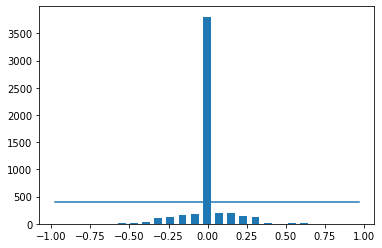

In [ ]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])),(samples_per_bin, samples_per_bin))

total data 5145
removed 3406
remaining:  1739


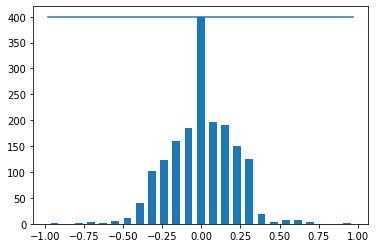

In [ ]:
print('total data', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j + 1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed', len(remove_list))
data.drop(data.index[remove_list], inplace = True)
print('remaining: ', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))

plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])),(samples_per_bin, samples_per_bin))

In [ ]:
def load_img_steering(datadir, df):
 image_path = []
 steering = []
 for i in range(len(data)):
   indexed_data = data.iloc[i]
   center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
   image_path.append(os.path.join(datadir, center.strip()))
   steering.append(float(indexed_data[3]))
   # left image append
   image_path.append(os.path.join(datadir,left.strip()))
   steering.append(float(indexed_data[3])+0.15)
   # right image append
   image_path.append(os.path.join(datadir,right.strip()))
   steering.append(float(indexed_data[3])-0.15)
 image_paths = np.asarray(image_path)
 steerings = np.asarray(steering)
 return image_paths, steerings

In [ ]:
image_paths, steerings = load_img_steering(datadir + '/IMG', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))


Training Samples: 4173
Valid Samples: 1044


Text(0.5, 1.0, 'Validation set')

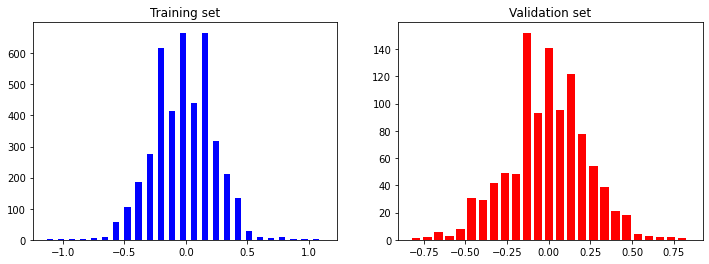

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [ ]:
def zoom(image):
  zoom = iaa.Affine(scale = (1 , 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

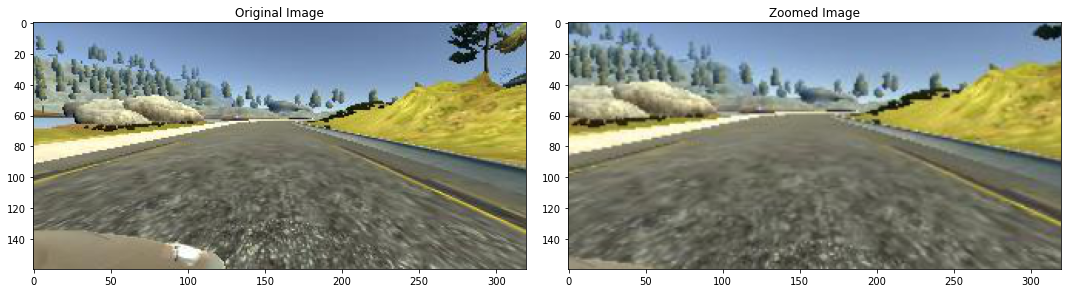

In [ ]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [ ]:
def pan(image):
  pan = iaa.Affine(translate_percent={"x" :(-0.1, 0.1), "y":(-0.1,0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

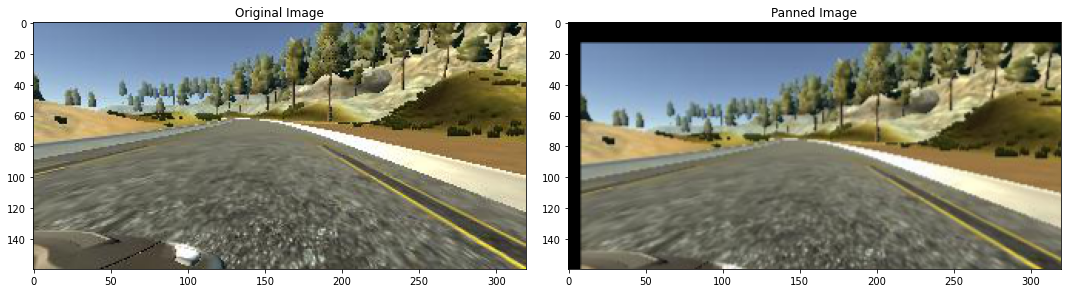

In [ ]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [ ]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'Brightness Altered Image')

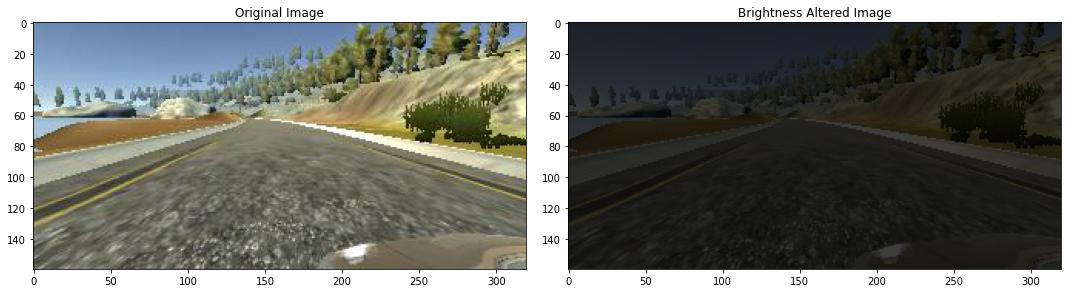

In [ ]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness Altered Image')

In [ ]:
def img_random_flip(image, steering_angle):
  image = cv2.flip(image, 1)
  steering_angle = -steering_angle
  return image, steering_angle

Text(0.5, 1.0, 'Flipped ImageSteering Angle: 0.3678963')

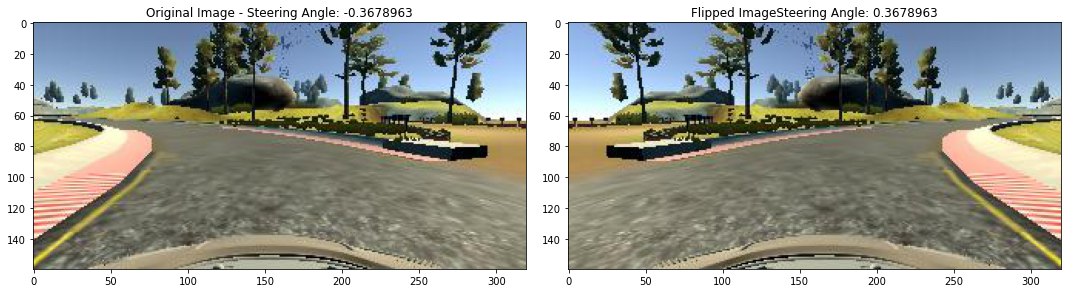

In [ ]:
random_index = random.randint(0,1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + "Steering Angle: " +str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image' + "Steering Angle: " +str(flipped_steering_angle))

In [ ]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = img_random_brightness(image)
  if np.random.rand() < 0.5:
    image, steering_angle = img_random_flip(image, steering_angle)  
  return image, steering_angle  

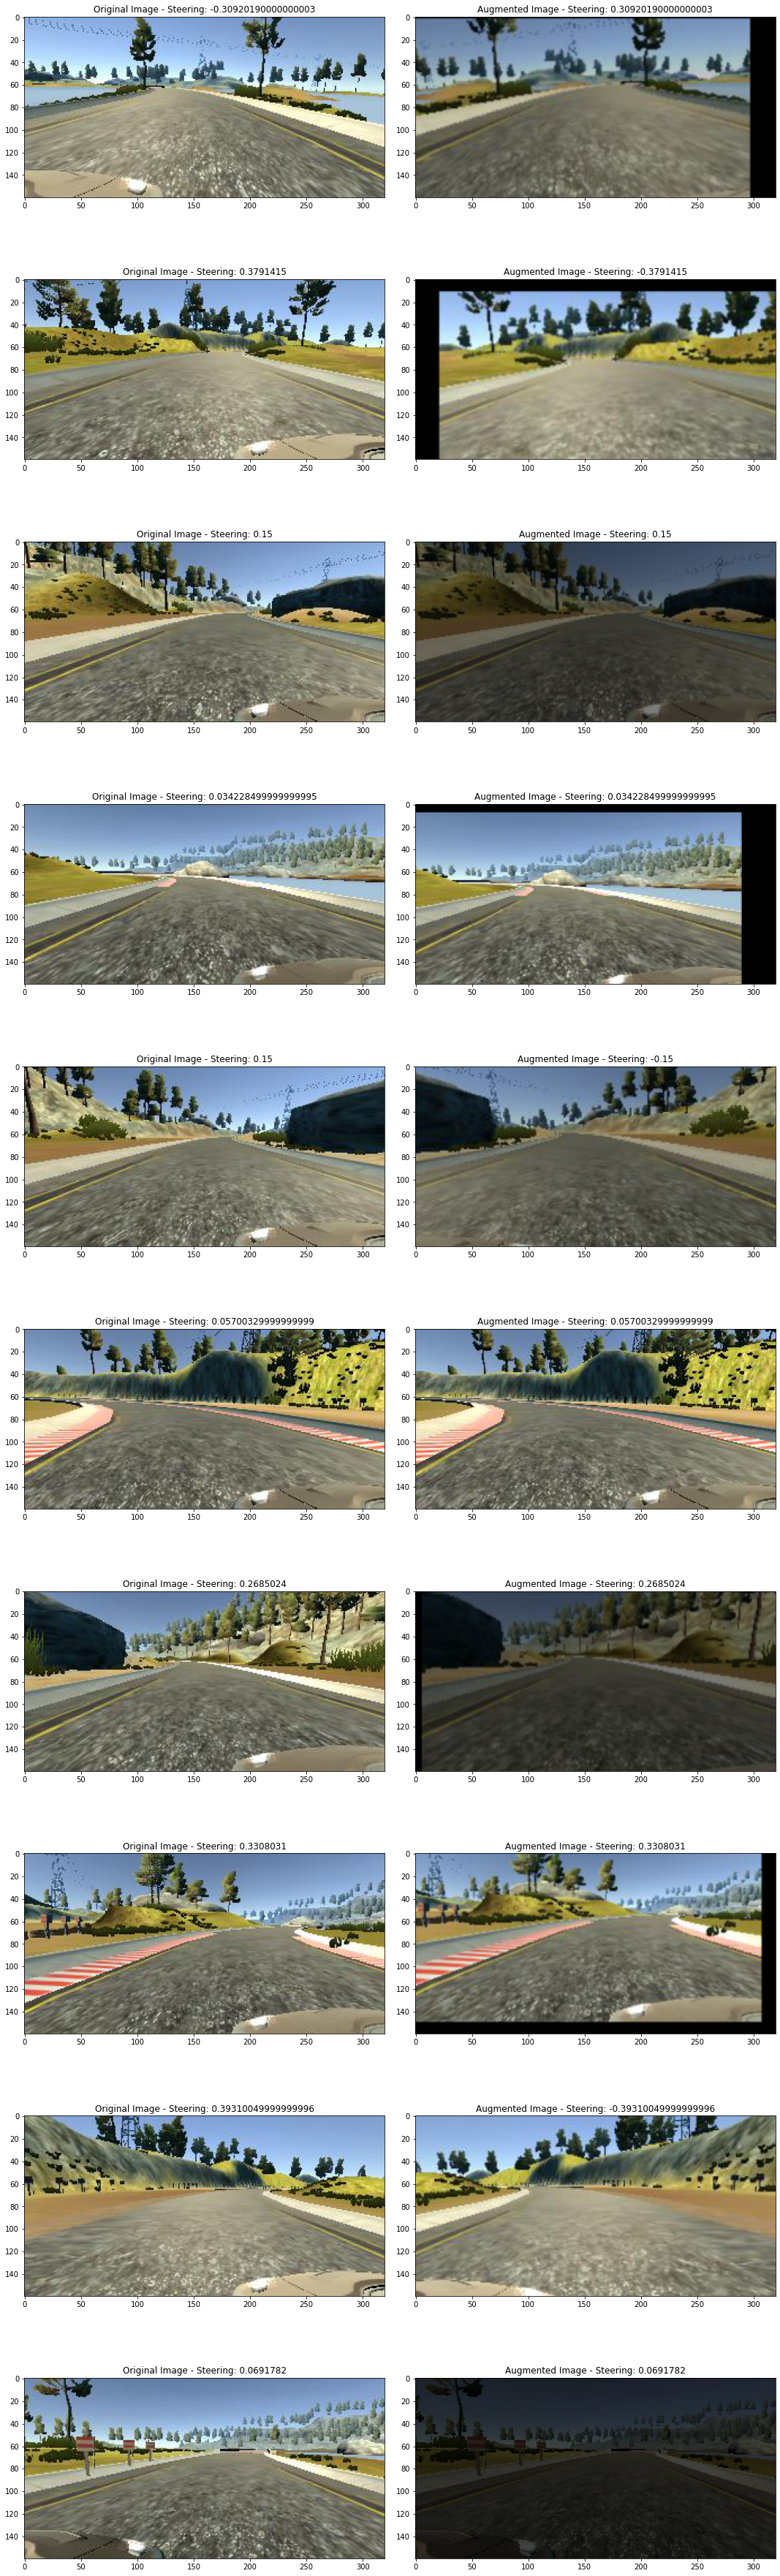

In [ ]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
 randnum = random.randint(0, len(image_paths) - 1)
 random_image = image_paths[randnum]
 random_steering = steerings[randnum]
  
 original_image = mpimg.imread(random_image)
 augmented_image, steering = random_augment(random_image, random_steering)
  
 axs[i][0].imshow(original_image)
 axs[i][0].set_title("Original Image - Steering: " + str(random_steering))


 axs[i][1].imshow(augmented_image)
 axs[i][1].set_title("Augmented Image - Steering: " + str(steering))

In [ ]:
 def img_preprocess(img):
   img = img[60:135,:,:]
   img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
   img = cv2.GaussianBlur(img,  (3, 3), 0)
   img = cv2.resize(img, (200, 66))
   img = img/255
   return img

Text(0.5, 1.0, 'Preprocessed Image')

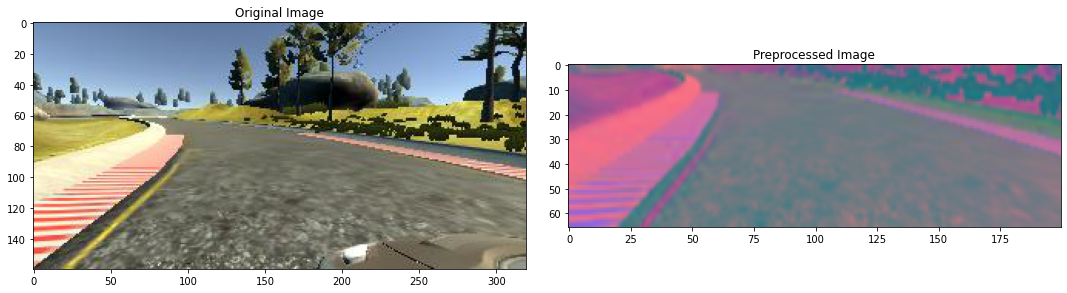

In [ ]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

 while True:
   batch_img = []
   batch_steering = []
  
   for i in range(batch_size):
     random_index = random.randint(0, len(image_paths) - 1)
     
     if istraining:
       im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     else:
       im = mpimg.imread(image_paths[random_index])
       steering = steering_ang[random_index]
    
     im = img_preprocess(im)
     batch_img.append(im)
     batch_steering.append(steering)
   yield (np.asarray(batch_img), np.asarray(batch_steering)) 

Text(0.5, 1.0, 'Validation Image')

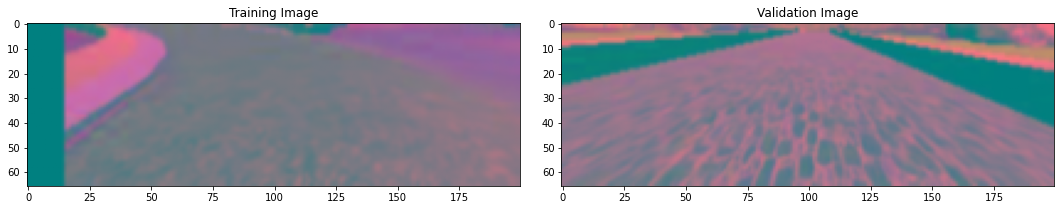

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [ ]:
from keras.layers.convolutional.conv2d_transpose import Convolution2DTranspose
def nvidia_model():

  model = Sequential()

  model.add(Convolution2D(24, kernel_size = (5, 5), strides = (2,2), input_shape = (66,200,3), activation = 'elu'))
  model.add(Convolution2D(36, kernel_size = (5, 5), strides = (2,2), activation = 'elu'))
  model.add(Convolution2D(48, kernel_size = (5, 5), strides = (2,2), activation = 'elu'))  
  model.add(Convolution2D(64, kernel_size = (3, 3), activation = 'elu'))
  
  model.add(Convolution2D(64, kernel_size = (3, 3), activation = 'elu'))
  model.add(Flatten())

  model.add(Dense(100, activation = 'elu'))

  model.add(Dense(50, activation = 'elu'))

  model.add(Dense(10, activation = 'elu'))

  model.add(Dense(1))
  
  optimizer = Adam(learning_rate = 1e-4)
  model.compile(loss = 'mse', optimizer = optimizer )

  return model


In [ ]:
model = nvidia_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [ ]:
history = model.fit_generator(batch_generator(X_train, y_train, batch_size = 100, istraining = 1), 
                              steps_per_epoch=300, epochs = 10,  
                              validation_data = batch_generator(X_valid, y_valid, batch_size = 100, istraining = 0), 
                              validation_steps = 200, 
                              verbose = 1, 
                              shuffle = 1)

<ipython-input-28-4754049076d7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(batch_generator(X_train, y_train, batch_size = 100, istraining = 1),


Epoch 1/10
300/300 [==============================] - 251s 832ms/step - loss: 0.0491 - val_loss: 0.0312
Epoch 2/10
300/300 [==============================] - 247s 825ms/step - loss: 0.0373 - val_loss: 0.0277
Epoch 3/10
300/300 [==============================] - 250s 835ms/step - loss: 0.0342 - val_loss: 0.0255
Epoch 4/10
300/300 [==============================] - 253s 844ms/step - loss: 0.0300 - val_loss: 0.0242
Epoch 5/10
300/300 [==============================] - 248s 826ms/step - loss: 0.0281 - val_loss: 0.0208
Epoch 6/10
300/300 [==============================] - 250s 836ms/step - loss: 0.0274 - val_loss: 0.0210
Epoch 7/10
300/300 [==============================] - 251s 838ms/step - loss: 0.0260 - val_loss: 0.0188
Epoch 8/10
300/300 [==============================] - 251s 837ms/step - loss: 0.0254 - val_loss: 0.0220
Epoch 9/10
300/300 [==============================] - 252s 841ms/step - loss: 0.0247 - val_loss: 0.0185
Epoch 10/10
300/300 [==============================] - 251s 837m

Text(0.5, 0, 'Epoch')

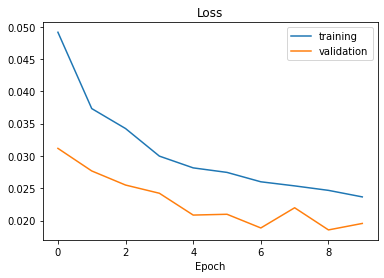

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>